          0         1
0  1.863411  0.087646
1 -1.530997  1.901182
2 -0.017224 -2.591112
3 -2.032039 -1.801162
4  4.620555  0.901124
   0
0  1
1  0
2  0
3  0
4  1


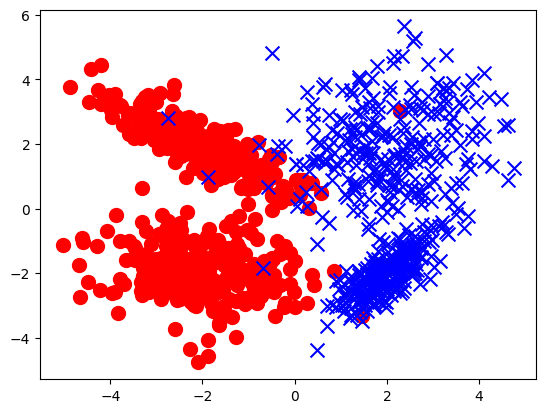

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score

# генерация данных
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    class_sep=2,
    random_state=1
)

print(pd.DataFrame(X).head())
print(pd.DataFrame(y).head())

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()


In [72]:
# градиентный спуск
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    # Задание 3.
    def _add_bias(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        X_b = self._add_bias(X)
        m = X_b.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X_b, y, start_b, self._n_iters)

# логистическая регрессия
class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        X_b = self._add_bias(X)
        return self.sigmoid(X_b, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred


In [73]:
# столбец единиц
#X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)

ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')


accuracy = 0.98 F1-score = 0.98


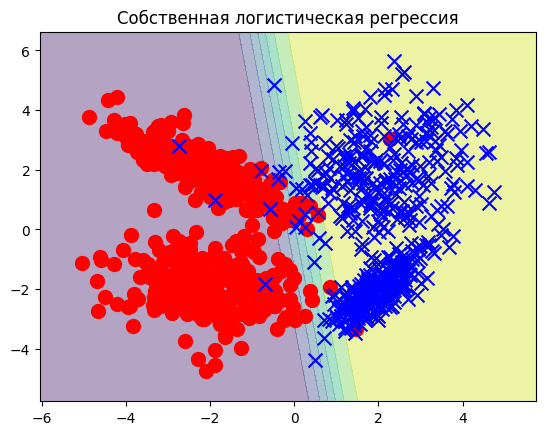

In [74]:
# визуализация разделяющей поверхности
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01),  # индекс 0
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))  # индекс 1
XX = np.c_[xx.ravel(), yy.ravel()]  # просто два признака, без bias
Z = logreg.predict_proba(XX)        # bias добавится внутри predict_proba
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.title('Собственная логистическая регрессия')
plt.show()


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)

ac_lr = accuracy_score(y, y_pred_lr)
f1_lr = f1_score(y, y_pred_lr)
print(f'sklearn: accuracy = {ac_lr:.2f} F1-score = {f1_lr:.2f}')

correct = np.sum(y_pred_lr == y)
incorrect = np.sum(y_pred_lr != y)
total = len(y)

print(f'\nДетальный анализ:')
print(f'Всего предсказаний: {total}')
print(f'Правильных: {correct} ({100*correct/total:.1f}%)')
print(f'Ошибок: {incorrect} ({100*incorrect/total:.1f}%)')
print(f'\nМатрица ошибок (Confusion Matrix):')
print(confusion_matrix(y, y_pred_lr))
print(f'\nОтчет классификации:')
print(classification_report(y, y_pred_lr))


sklearn: accuracy = 0.98 F1-score = 0.98

Детальный анализ:
Всего предсказаний: 1000
Правильных: 976 (97.6%)
Ошибок: 24 (2.4%)

Матрица ошибок (Confusion Matrix):
[[485  14]
 [ 10 491]]

Отчет классификации:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       499
           1       0.97      0.98      0.98       501

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



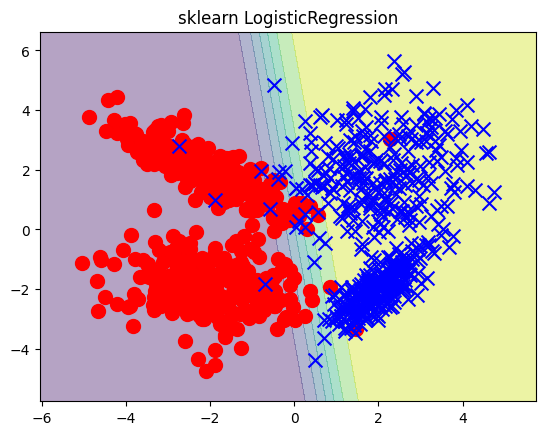

In [77]:
Z_lr = model.predict_proba(XX)[:, 1]
Z_lr = Z_lr.reshape(xx.shape)
plt.contourf(xx, yy, Z_lr, alpha=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.title('sklearn LogisticRegression')
plt.show()


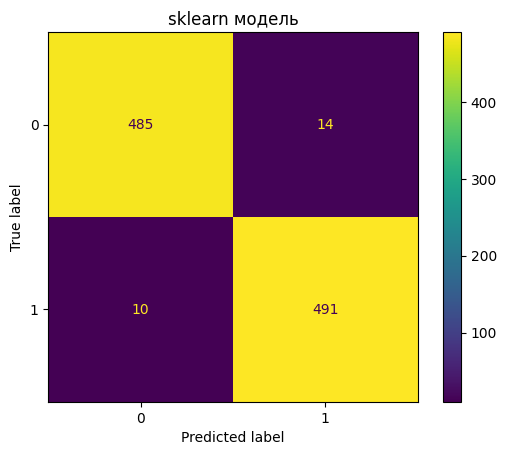

sklearn модель: accuracy = 0.98, F1-score = 0.98


In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_sklearn = confusion_matrix(y, y_pred_lr)
ConfusionMatrixDisplay(confusion_matrix=cm_sklearn).plot()
plt.title('sklearn модель')
plt.show()

print(f'sklearn модель: accuracy = {ac_lr:.2f}, F1-score = {f1_lr:.2f}')


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

alpha_values = [0.0000001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]

print(f"{'Alpha':<12} {'Loss':<12} {'Accuracy':<10} {'F1-score'}")

for alpha in alpha_values:
    C = 1.0 / alpha  # sklearn uses C = 1/alpha (inverse regularization)
    model_a = LogisticRegression(C=C, max_iter=1000)
    model_a.fit(X, y)
    y_pred_a = model_a.predict(X)
    y_proba_a = model_a.predict_proba(X)
    
    loss = -np.mean(    
        y * np.log(y_proba_a[:, 1] + 1e-15) + (1 - y) * np.log(y_proba_a[:, 0] + 1e-15)
    )
    
    ac_a = accuracy_score(y, y_pred_a)
    f1_a = f1_score(y, y_pred_a)
    
    print(f"{alpha:<12} {loss:<12.4f} {ac_a:<10.4f} {f1_a:.4f}")

Alpha        Loss         Accuracy   F1-score
1e-07        0.0756       0.9760     0.9761
0.01         0.0756       0.9760     0.9761
0.05         0.0756       0.9760     0.9761
0.1          0.0756       0.9760     0.9761
0.5          0.0757       0.9760     0.9761
1.0          0.0760       0.9760     0.9761
2.0          0.0769       0.9760     0.9761
5.0          0.0801       0.9750     0.9751
10.0         0.0856       0.9750     0.9751
20.0         0.0956       0.9760     0.9761
50.0         0.1190       0.9760     0.9762
100.0        0.1477       0.9760     0.9762
500.0        0.2696       0.9750     0.9752
1000.0       0.3495       0.9730     0.9732


## Task 4

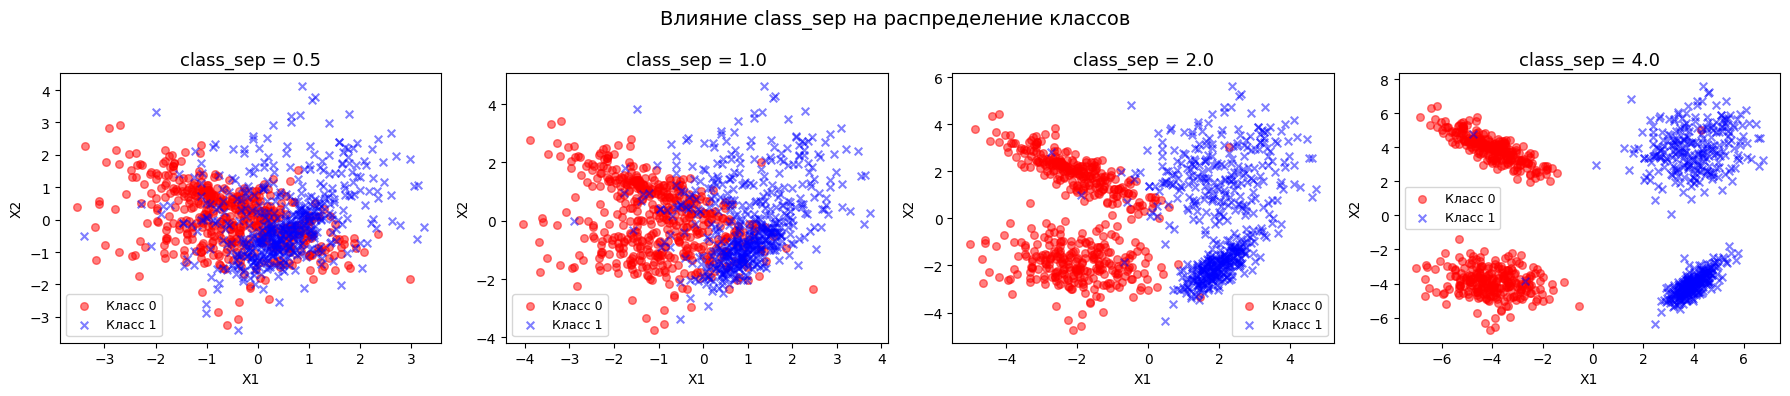

In [80]:
class_sep_values = [0.5, 1.0, 2.0, 4.0]

fig, axes = plt.subplots(1, 4, figsize=(18, 4))

for ax, cs in zip(axes, class_sep_values):
    X_cs, y_cs = make_classification(
        n_samples=1000,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        class_sep=cs,
        random_state=1
    )
    ax.scatter(X_cs[:, 0][y_cs==0], X_cs[:, 1][y_cs==0], marker='o', c='r', s=30, alpha=0.5, label='Класс 0')
    ax.scatter(X_cs[:, 0][y_cs==1], X_cs[:, 1][y_cs==1], marker='x', c='b', s=30, alpha=0.5, label='Класс 1')
    ax.set_title(f'class_sep = {cs}', fontsize=13)
    ax.legend(fontsize=9)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

plt.suptitle('Влияние class_sep на распределение классов', fontsize=14)
plt.tight_layout()
plt.show()

При малых class_sep 0.1-0.5 облака точек сильно перекрываются и их сложнее разделить. С ростом class_sep классы расходятся.

## Task 5

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

X_big, y_big = make_classification(
    n_samples=1000,
    n_features=20,        # 20 признаков
    n_informative=10,     # 10 из них действительно информативны
    n_redundant=5,
    n_repeated=0,
    n_classes=2,
    class_sep=1.5,
    random_state=42
)

print(f"Размер датасета: {X_big.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X_big, y_big, test_size=0.2, random_state=42
)

model = LogReg(alpha=0.1, n_iters=1000)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

print(f"\n{'Выборка':<12} {'Accuracy':>10} {'F1-score':>10}")
print("-" * 34)
print(f"{'Train':<12} {accuracy_score(y_train, y_pred_train):>10.4f} {f1_score(y_train, y_pred_train):>10.4f}")
print(f"{'Test':<12} {accuracy_score(y_test,  y_pred_test ):>10.4f} {f1_score(y_test,  y_pred_test ):>10.4f}")

Размер датасета: (1000, 20)

Выборка        Accuracy   F1-score
----------------------------------
Train            0.9375     0.9390
Test             0.9250     0.9268
